# Extended Data Figure 1 – Generation of a TP53 prime editing sensor library with PEGG.

## Extended Data Figure 1b
Breakdown of the TP53 variants input to PEGG for sensory library design

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import os
#import re
import scipy.stats
import regex as re
from adjustText import adjust_text
import matplotlib.patheffects as PathEffects
from mpl_toolkits.axes_grid1 import make_axes_locatable
import statannot
import warnings
warnings.filterwarnings('ignore')
plt.rc('font', family='Helvetica')

In [90]:
#reading in input dataframe
input = pd.read_csv('full_input_variants.csv')

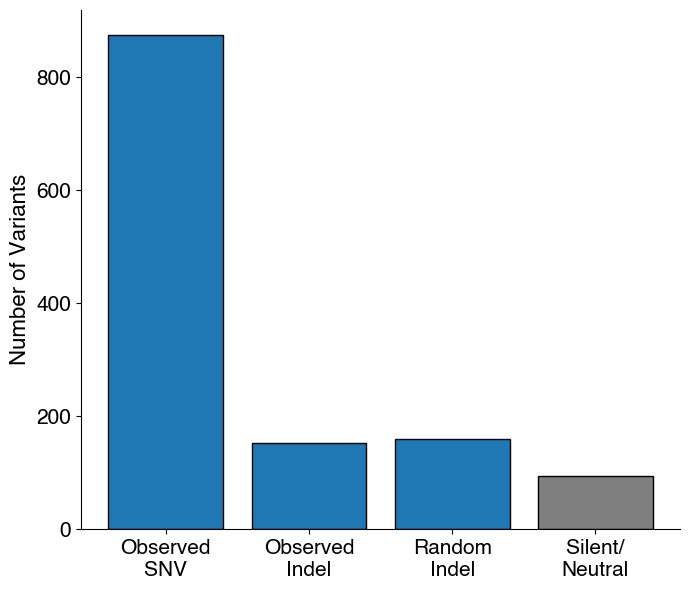

In [91]:
u, c = np.unique(input['classification'], return_counts=True)

fig, ax = plt.subplots(figsize=(7,6))
ax.bar(['Observed\nSNV', 'Observed\nIndel', 'Random\nIndel', 'Silent/\nNeutral'],c, color = ['tab:blue', 'tab:blue', 'tab:blue', 'tab:grey'], edgecolor='black', linewidth=1)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.tick_params(axis='both', which='major', labelsize=15)
ax.set_ylabel('Number of Variants', fontsize=16)

fig.tight_layout()

## Extended Data Figure 1c
The fraction of input variants amenable to prime editing (i.e., able to generate ≥ 1 pegRNA), separated by variant type.

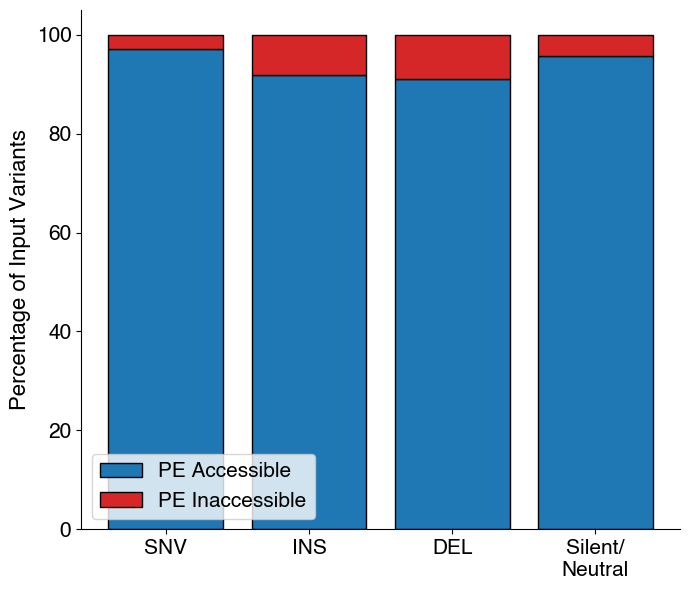

In [92]:
snv = input[input['classification']=='Observed SNV']
ins = input[input['variant_type']=='INS']
dels = input[input['variant_type']=='DEL']
neutrals = input[input['classification']=='Silent']

snv_amenable = snv[snv['PE_amenable']==True]
ins_amenable = ins[ins['PE_amenable']==True]
dels_amenable = dels[dels['PE_amenable']==True]
neutrals_amenable = neutrals[neutrals['PE_amenable']==True]

s = 100*len(snv_amenable)/len(snv)
i = 100*len(ins_amenable)/len(ins)
d = 100*len(dels_amenable)/len(dels)
n = 100*len(neutrals_amenable)/len(neutrals)

    
fig, ax = plt.subplots(figsize=(7,6))
ax.bar(['SNV', 'INS', 'DEL', 'Silent/\nNeutral'],[s,i,d,n], color = ['tab:blue'], edgecolor='black', linewidth=1, label='PE Accessible')
ax.bar(['SNV', 'INS', 'DEL', 'Silent/\nNeutral'],100-np.array([s,i,d,n]), bottom = [s,i,d,n], color = ['tab:red'], edgecolor='black', linewidth=1, label='PE Inaccessible')

ax.legend(fontsize=15)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.tick_params(axis='both', which='major', labelsize=15)
ax.set_ylabel('Percentage of Input Variants', fontsize=16)

fig.tight_layout()


## Extended Data Figure 1d
Histogram of the number of pegRNA designs per variant.

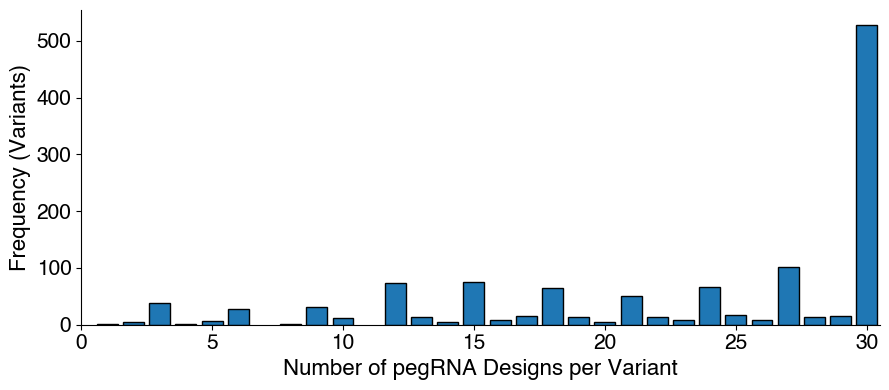

In [3]:
p53_filtered = pd.read_csv('p53_PE_sensor_FINAL_clean.csv')

u, c = np.unique(p53_filtered['variant_index'], return_counts=True)

u2, c2 = np.unique(c, return_counts=True)

fig, ax = plt.subplots(figsize=(9,4))
ax.bar(u2, c2, linewidth=1, edgecolor='black')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.tick_params(axis='both', which='major', labelsize=15)
ax.set_ylabel('Frequency (Variants)', fontsize=16)
ax.set_xlabel('Number of pegRNA Designs per Variant', fontsize=16)
ax.set_xlim(0,30.5)
fig.tight_layout()

## Extended Data Figure 1e
Histogram of the MIT specificity score of the protospacers for the pegRNAs included in the library. The library was filtered to exclude pegRNAs containing a protospacer with an MIT specificity score less than 50. 


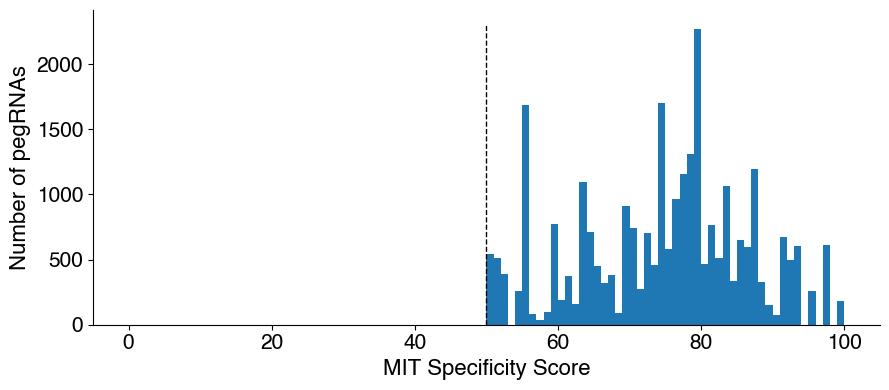

In [94]:
fig, ax = plt.subplots(figsize=(9,4))
spec = np.array(p53_filtered['MIT_specificity'])
ax.hist(spec, bins = np.linspace(0,100,101))

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.tick_params(axis='both', which='major', labelsize=15)
ax.set_ylabel('Number of pegRNAs', fontsize=16)
ax.set_xlabel('MIT Specificity Score', fontsize=16)

ax.plot([50,50],[0,2300], linestyle='dashed', linewidth=1, color='black')

fig.tight_layout()

# Extended Data Figure 2 – Optimization, screening, and deconvolution of the TP53 prime editing sensor library.
## Extended Data Figure 2a

Data for figure 2a was analyzed and compiled in FlowJo

## Extended Data Figure 2b
Cumulative population doublings during the course of the screen of each of the replicates in the untreated and Nutlin-treated conditions.

In [115]:
#read in CPD data (calculated from cell counts)
cpds = pd.read_csv('screen_cell_counts/cpds.csv')
cpds

,days_post_transduction,untreated_REP1,untreated_REP2,untreated_REP3,nutlin_REP1,nutlin_REP2,nutlin_REP3
0,4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,7,0.942346,1.131521,0.824805,-0.191659,0.030067,-0.218610
2,10,1.725110,1.968739,1.856720,-0.405863,-0.323890,-0.347617
3,13,2.772870,2.929127,2.609749,-0.139403,0.216219,0.127213
4,16,3.801380,3.997013,3.704098,1.077276,1.259846,1.231980
5,19,4.878052,4.985175,4.778021,2.505473,2.569266,2.569944
6,22,5.832249,6.123894,5.874711,3.666320,3.991451,3.936054
7,25,7.070345,7.129282,6.951047,4.777689,5.235245,5.124827
8,28,8.161430,8.108972,7.664149,5.885829,6.542040,6.112289
9,31,9.199981,9.036263,8.704968,7.143500,7.917476,7.156766


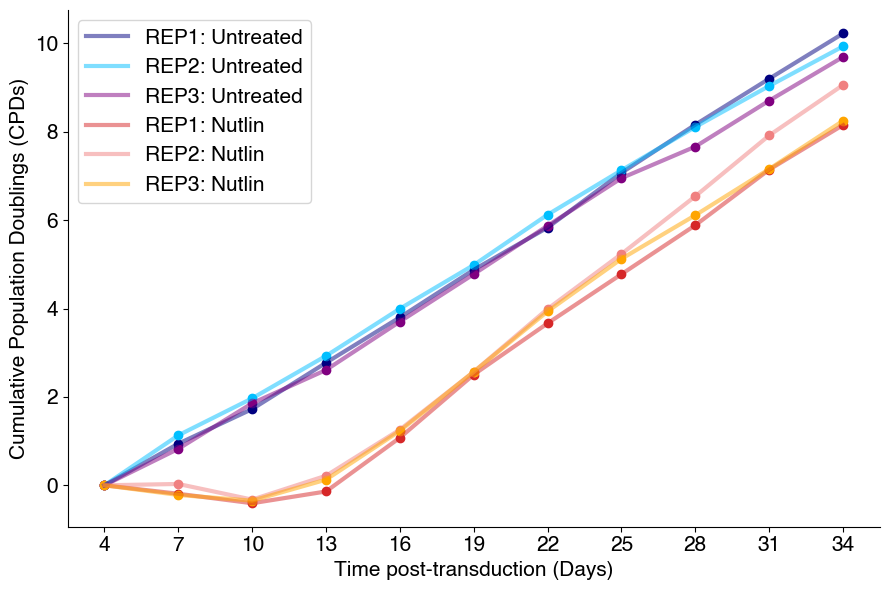

In [116]:
#making a shared plot

cpd_untreated_rep1 = cpds['untreated_REP1']
cpd_untreated_rep2 = cpds['untreated_REP2']
cpd_untreated_rep3 = cpds['untreated_REP3']
cpd_nutlin_rep1 = cpds['nutlin_REP1']
cpd_nutlin_rep2 = cpds['nutlin_REP2']
cpd_nutlin_rep3 = cpds['nutlin_REP3']

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(9,6))

#plotting the averages...
colors = ['navy', 'deepskyblue', 'purple']
colors2 = ['tab:red', 'lightcoral', 'orange']

#--------------Now plotting the CPDs-----------

t2 = [4,7,10,13,16,19,22,25, 28, 31, 34]
ax.plot(t2, cpd_untreated_rep1, c=colors[0], linewidth=3, alpha=.5, label='REP1: Untreated')
ax.plot(t2, cpd_untreated_rep2, c=colors[1], linewidth=3, alpha=.5, label='REP2: Untreated')
ax.plot(t2, cpd_untreated_rep3, c=colors[2], linewidth=3, alpha=.5, label='REP3: Untreated')
ax.plot(t2, cpd_nutlin_rep1, c=colors2[0], linewidth=3, alpha=.5, label='REP1: Nutlin')
ax.plot(t2, cpd_nutlin_rep2, c=colors2[1], linewidth=3, alpha=.5, label='REP2: Nutlin')
ax.plot(t2, cpd_nutlin_rep3, c=colors2[2], linewidth=3, alpha=.5, label='REP3: Nutlin')

ax.scatter(t2, cpd_untreated_rep1, c=colors[0])
ax.scatter(t2, cpd_untreated_rep2, c=colors[1])
ax.scatter(t2, cpd_untreated_rep3, c=colors[2])
ax.scatter(t2, cpd_nutlin_rep1, c=colors2[0])
ax.scatter(t2, cpd_nutlin_rep2, c=colors2[1])
ax.scatter(t2, cpd_nutlin_rep3, c=colors2[2])

ax.set_xlabel('Time post-transduction (Days)', fontsize=15)
ax.set_ylabel('Cumulative Population Doublings (CPDs)', fontsize=15)
ax.set_xticks([4,7,10,13,16,19,22,25, 28,31, 34])
ax.legend(fontsize=15)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.tick_params(axis='both', which='major', labelsize=15)
fig.tight_layout()

## Extended Data Figure 2c

Identification and counting of pegRNAs in each replicate and time-point from high quality reads (Q>30). Correct ID = reads with matching protospacer and 3’ extension. Recombined = reads with mismatched protospacer and 3’ extension. No match = reads with no matching sequence for protospacer or 3’ extension. Unaligned = reads with no identifiable tevopreQ1 sequence. Plasmid = Plasmid Library. 

In [95]:
samples = ['Plasmid-Library', 'D4-REP1', 'D4-REP2', 'D4-REP3',
'D16-REP1', 'D16-REP2', 'D16-REP3',
'D16-NUT-REP1', 'D16-NUT-REP2', 'D16-NUT-REP3',
'D25-REP1', 'D25-REP2', 'D25-REP3',
'D25-NUT-REP1', 'D25-NUT-REP2','D25-NUT-REP3',
'D34-REP1', 'D34-REP2', 'D34-REP3',
'D34-NUT-REP1', 'D34-NUT-REP2', 'D34-NUT-REP3']

counts = []
classif = []

for name in samples:
    a = pd.read_csv(f"counts_merged/counts/{name}_counts.csv")
    b = pd.read_csv(f"counts_merged/classification/{name}_classification.csv")
    counts.append(a)
    classif.append(b)

count_dict = dict(zip(samples, counts))
class_dict = dict(zip(samples, classif))

In [96]:
c_perc = []
d_perc = []
l_perc = []
nm_perc = []
un_perc = []
corr_id_total = []
for name in samples:
    d = class_dict[name]
    
    gq = d[d['classification']=='good quality']['count'].values[0]
    dc =  d[d['classification']=="decoupled extension-protospacer"]['count'].values[0]
    corr = d[d['classification']=="correct id"]['count'].values[0]

    low_qual = sum(d[d['classification'].isin(["low_qual_r1", "low_qual_r2", "low_qual_r12"])]['count'])

    no_match = sum(d[d['classification'].isin(["no extension match", "no protospacer match"])]['count'])
    unaligned = d[d['classification']=="unaligned tevo"]['count'].values[0]

    d_perc.append(100*dc/gq)
    c_perc.append(100*corr/gq)
    l_perc.append(100*low_qual/gq)
    nm_perc.append(100*no_match/gq)
    un_perc.append(100*unaligned/gq)

    corr_id_total.append(corr)

/var/folders/5g/xxjcy2g531n02hnyb6d8qdsr0000gn/T/ipykernel_23544/902250332.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(samples, rotation=90);


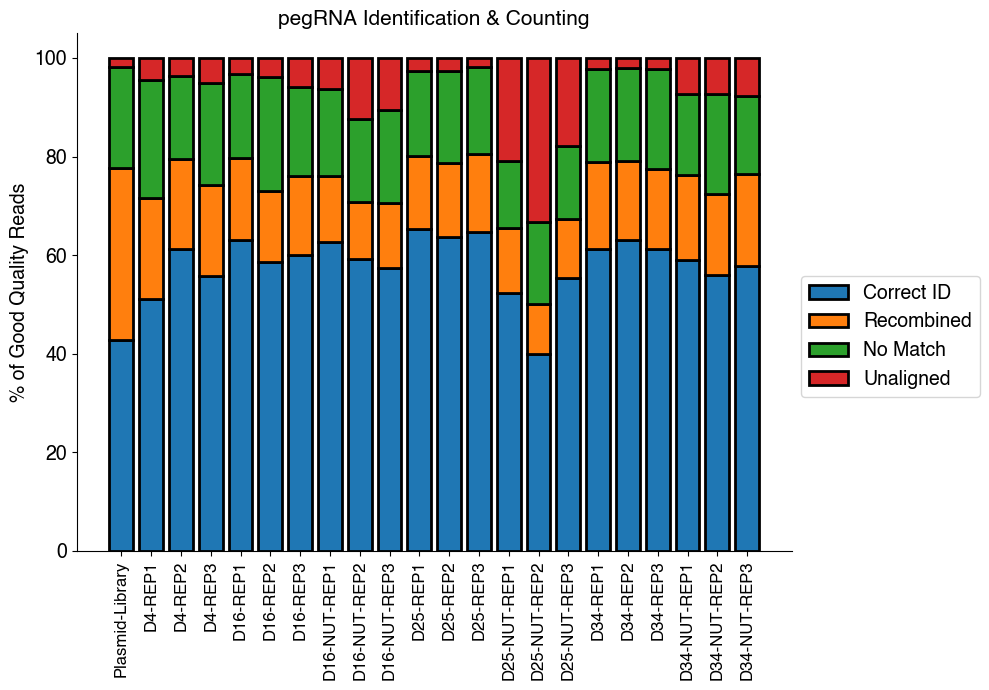

In [97]:
fig, ax = plt.subplots(figsize=(10,7))

ax.bar(samples, c_perc, label='Correct ID', linewidth=2, edgecolor='black')
ax.bar(samples, d_perc,bottom=c_perc, label="Recombined", linewidth=2, edgecolor='black')
ax.bar(samples, nm_perc,bottom=np.array(c_perc) + np.array(d_perc), label="No Match", linewidth=2, edgecolor='black')
ax.bar(samples, un_perc,bottom=np.array(c_perc) + np.array(d_perc) + np.array(nm_perc), label="Unaligned", linewidth=2, edgecolor='black')
#ax.bar(samples, l_perc,bottom=np.array(c_perc) + np.array(d_perc) + np.array(nm_perc) + np.array(un_perc), label="Low Quality", linewidth=2, edgecolor='black')

ax.legend(fontsize=14,bbox_to_anchor=(1, .55))

ax.set_xticklabels(samples, rotation=90);
plt.yticks(fontsize=14);
plt.xticks(fontsize=12);
ax.set_ylabel("% of Good Quality Reads", fontsize=14);
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_title('pegRNA Identification & Counting', fontsize=15)
fig.tight_layout()

## Extended Data Figure 2d

Count of correctly identified pegRNAs in each replicate and time-point.

/var/folders/5g/xxjcy2g531n02hnyb6d8qdsr0000gn/T/ipykernel_23544/1581069353.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(samples, rotation=90);


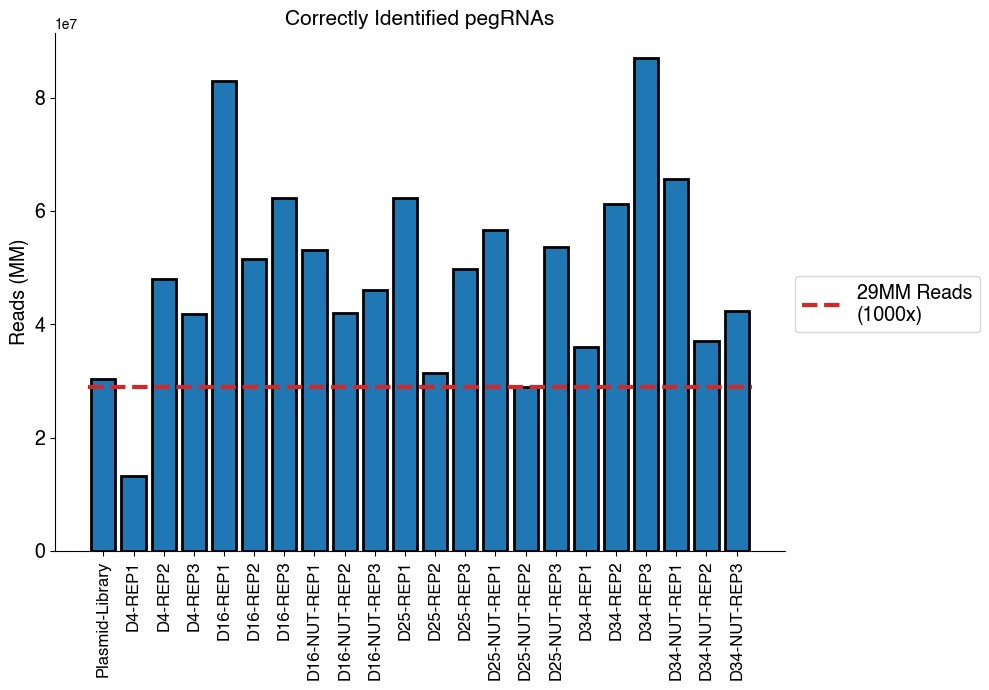

In [98]:
fig, ax = plt.subplots(figsize=(10,7))

ax.bar(samples, corr_id_total,  linewidth=2, edgecolor='black')
ax.plot([0-.5,len(samples)-.5], [29e6, 29e6], c='tab:red', linestyle='dashed', linewidth=3, label='29MM Reads\n(1000x)')

plt.legend(fontsize=14,bbox_to_anchor=(1, .55))
ax.set_xticklabels(samples, rotation=90);
plt.yticks(fontsize=14);
plt.xticks(fontsize=12);
ax.set_ylabel("Reads (MM)", fontsize=14);

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_title('Correctly Identified pegRNAs', fontsize=15)
fig.tight_layout()

## Extended Data Figure 2e
Extraction of the sensor locus from reads with correctly identified pegRNAs. Extracted sensor = sensor read matches pegRNA identification and is thus extracted and saved. Recombined = sensor read does not match pegRNA (discarded). Unaligned = no polyT-tevopreQ1 sequence found.

In [99]:
# and also looking at recombination rate
peg_extract = []
peg_recombined = []
peg_unalign = []

sum_extract = []
sum_recombined = []
sum_unaligned = []
for x in samples:

    df = count_dict[x]
    df = df[df['total']>0]

    total = np.array(df['total'])
    recomb = np.array(df['recombination'])
    extract = np.array(df['extracted'])
    unaligned = np.array(df['unaligned'])

    sum_extract.append(100*(sum(extract)/sum(total)))
    sum_recombined.append(100*(sum(recomb)/sum(total)))
    sum_unaligned.append(100*(sum(unaligned)/sum(total)))

/var/folders/5g/xxjcy2g531n02hnyb6d8qdsr0000gn/T/ipykernel_23544/96543164.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(samples, rotation=90);


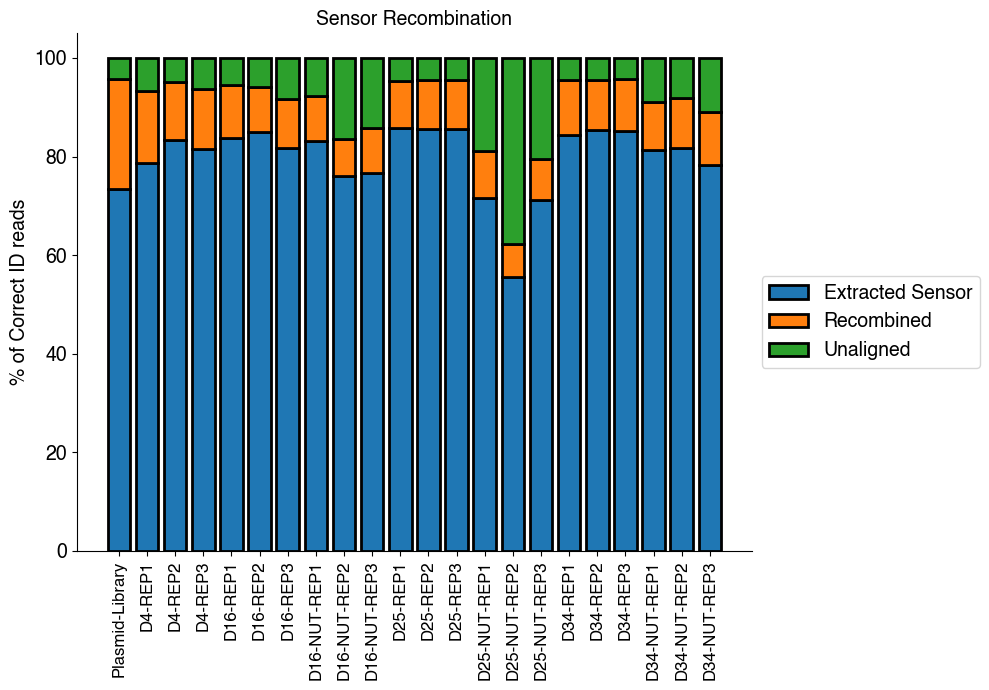

In [100]:
fig, ax = plt.subplots(figsize=(10,7))

ax.bar(samples, sum_extract, label='Extracted Sensor', linewidth=2, edgecolor='black')
ax.bar(samples, sum_recombined,bottom=sum_extract, label="Recombined", linewidth=2, edgecolor='black')
ax.bar(samples, sum_unaligned,bottom=np.array(sum_extract) + np.array(sum_recombined), label="Unaligned", linewidth=2, edgecolor='black')
#ax.bar(samples, l_perc,bottom=np.array(c_perc) + np.array(d_perc) + np.array(nm_perc) + np.array(un_perc), label="Low Quality", linewidth=2, edgecolor='black')

ax.legend(fontsize=14,bbox_to_anchor=(1, .55))

ax.set_xticklabels(samples, rotation=90);
plt.yticks(fontsize=14);
plt.xticks(fontsize=12);
ax.set_ylabel("% of Correct ID reads", fontsize=14);

ax.set_title("Sensor Recombination", fontsize=14)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

fig.tight_layout()

## Extended Data Figure 2f
Sensor recombination rate as a function of protospacer orientation. When the protospacer is on the positive strand (+) of the sensor (blue), the recombination rate increases compared to when the protospacer is on the negative strand (-) of the sensor. 

In [101]:
p53_full = p53_filtered


plus_total = []
minus_total = []

plus_strand = np.array(p53_full['PAM_strand']=='+')
minus_strand = ~np.array(p53_full['PAM_strand']=='+')

for x in samples:

    df = count_dict[x]
    df['peg_id'] = ['peg_' + str(i) for i in  df['pegRNA_idx']]
    df = df[df['peg_id'].isin(p53_filtered['peg_id'])]

    df_plus = df[plus_strand]
    df_minus = df[minus_strand]

    df_plus = df_plus[df_plus['total']>0]
    df_minus = df_minus[df_minus['total']>0]

    

    total_plus = np.array(df_plus['total'])
    recomb_plus = np.array(df_plus['recombination'])

    total_minus = np.array(df_minus['total'])
    recomb_minus = np.array(df_minus['recombination'])

    plus_total.append(100*(sum(recomb_plus)/sum(total_plus)))
    minus_total.append(100*(sum(recomb_minus)/sum(total_minus)))

plus = pd.DataFrame(dict(zip(["Sample", "PAM orientation", "recombination average"],[samples, ["+"]*len(peg_recombined_plus), plus_total])))
minus =pd.DataFrame(dict(zip(["Sample", "PAM orientation", "recombination average"],[samples, ["–"]*len(peg_recombined_minus), minus_total])))

reco_pam = pd.concat((plus, minus))

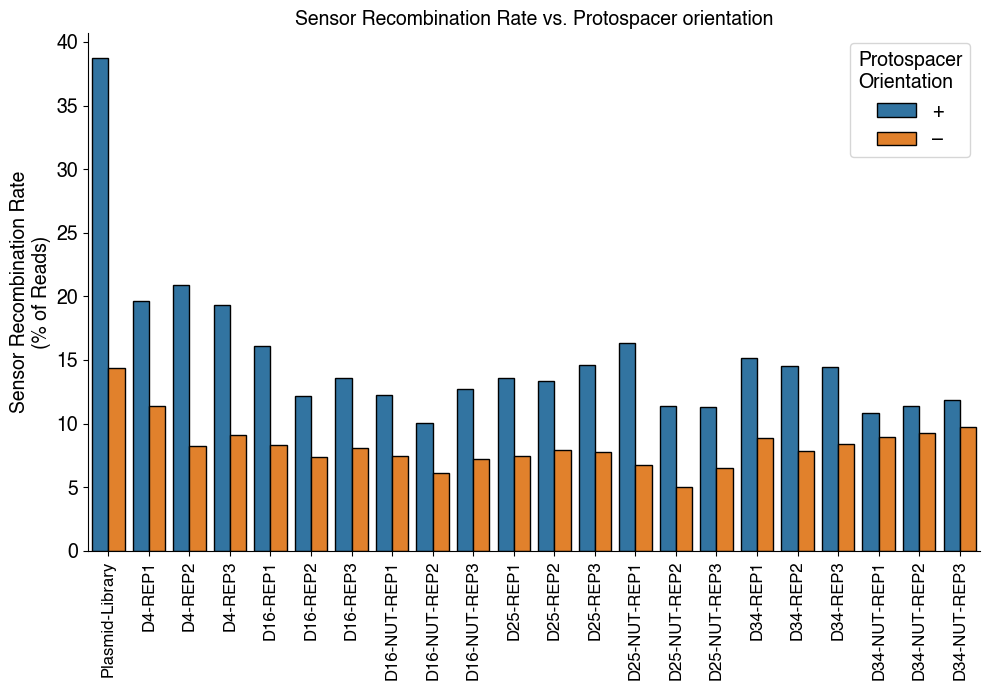

In [111]:

fig, ax = plt.subplots(figsize=(10,7))

g = sns.barplot(data=reco_pam, x='Sample', y='recombination average', hue='PAM orientation', ax=ax, linewidth=1, edgecolor='black')

ax.legend(title = 'Protospacer\nOrientation', title_fontsize=14, fontsize=14)

ax.set_xticklabels(samples, rotation=90);
plt.yticks(fontsize=14);
plt.xticks(fontsize=12);
ax.set_ylabel("Sensor Recombination Rate\n(% of Reads)", fontsize=14);
ax.set_xlabel("", fontsize=14);
ax.set_title("Sensor Recombination Rate vs. Protospacer orientation", fontsize=14);


ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

fig.tight_layout()

# Extended Data Figure 3 – The TP53 prime editing sensor screen is highly reproducible with low indel rates.
## Extended Data Figure 3a
Pearson correlation in raw pegRNA counts among each replicate and time-point. Plasmid = plasmid library. 

In [37]:
raw_counts = pd.read_csv('counts_merged/raw_counts.csv')

order = ['D4-REP1', 'D4-REP2', 'D4-REP3',
'D16-REP1', 'D16-REP2', 'D16-REP3',
'D25-REP1', 'D25-REP2', 'D25-REP3',
'D34-REP1', 'D34-REP2', 'D34-REP3',
'D16-NUT-REP1', 'D16-NUT-REP2', 'D16-NUT-REP3',
'D25-NUT-REP1', 'D25-NUT-REP2','D25-NUT-REP3',
'D34-NUT-REP1', 'D34-NUT-REP2', 'D34-NUT-REP3']

raw = raw_counts[order]

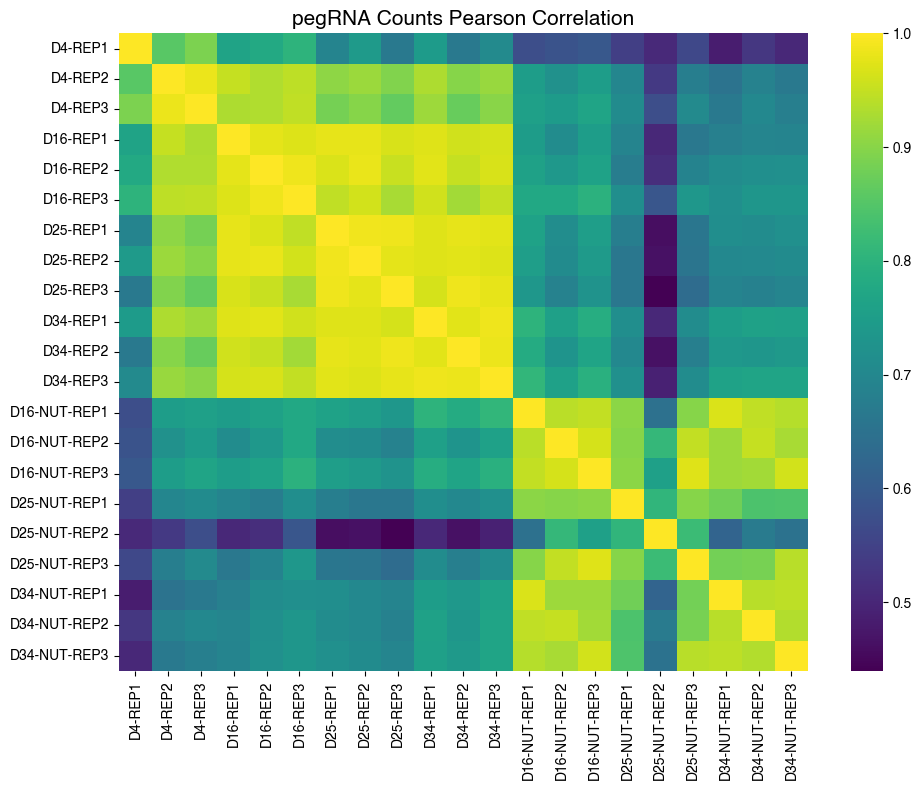

In [39]:
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(raw.corr(method='pearson'), cmap='viridis')
ax.set_title('pegRNA Counts Pearson Correlation', fontsize=15)
fig.tight_layout()

## Extended Data Figure 3b
Spearman correlation in sensor correct editing percentage among each replicate and time-point for pegRNAs with at least 10 sensor reads.

In [30]:
samples = ['D4-REP1', 'D4-REP2', 'D4-REP3',
'D16-REP1', 'D16-REP2', 'D16-REP3',
'D16-NUT-REP1', 'D16-NUT-REP2', 'D16-NUT-REP3',
'D25-REP1', 'D25-REP2', 'D25-REP3',
'D25-NUT-REP1', 'D25-NUT-REP2','D25-NUT-REP3',
'D34-REP1', 'D34-REP2', 'D34-REP3',
'D34-NUT-REP1', 'D34-NUT-REP2', 'D34-NUT-REP3']

crispresso = os.listdir("crispresso/compact_filtered_background_subtracted")

reorder = []
for i in samples:
    for k in crispresso:
        if i in k:
            df = pd.read_csv(f"crispresso/compact_filtered_background_subtracted/{k}")
            reorder.append(df)


cp_dict = dict(zip(samples, reorder))

In [31]:
cps = []
for x in samples: 
    df = cp_dict[x]
    cp = df['corr_perc_backsub']
    cps.append(cp)

c = pd.DataFrame(dict(zip(samples, cps)))
c['peg_id'] = cp_dict['D4-REP1']['peg_id']

counts_threshold = 10
pp = []
for x in samples: 
    df = cp_dict[x]
    df = df[df['Reads_aligned_all_amplicons']>=10]
    pegs = df['peg_id']
    pp.append(pegs)

inter = list(set.intersection(*map(set,pp)))

c_thresh = c[c['peg_id'].isin(inter)]

order = ['D4-REP1', 'D4-REP2', 'D4-REP3',
'D16-REP1', 'D16-REP2', 'D16-REP3',
'D25-REP1', 'D25-REP2', 'D25-REP3',
'D34-REP1', 'D34-REP2', 'D34-REP3',
'D16-NUT-REP1', 'D16-NUT-REP2', 'D16-NUT-REP3',
'D25-NUT-REP1', 'D25-NUT-REP2','D25-NUT-REP3',
'D34-NUT-REP1', 'D34-NUT-REP2', 'D34-NUT-REP3']
cord = c[order].corr(method='spearman')

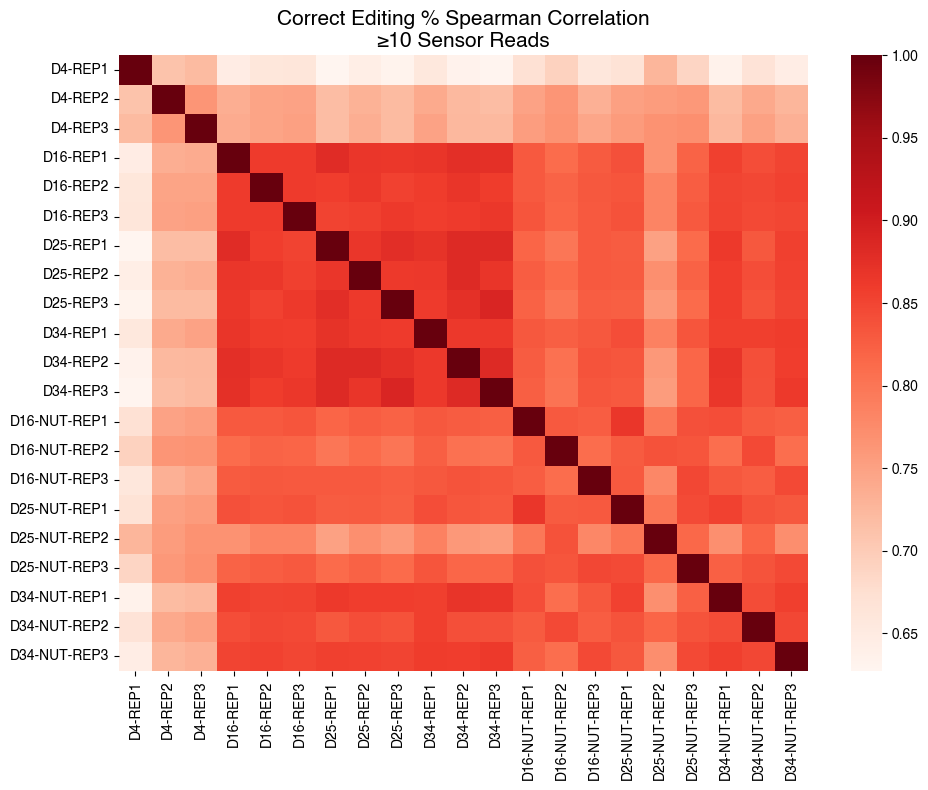

In [33]:
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(cord, cmap='Reds')
ax.set_title('Correct Editing % Spearman Correlation\n≥10 Sensor Reads', fontsize=15)
fig.tight_layout()

## Extended Data Figure 3c
Median indel percentage among active pegRNAs (≥1% editing) for each time-point and condition.

In [40]:
avgs = []
indels = []
total_indel = []
byprod = []
WT1 = []
count_threshold=10

#calculating oveall average
for x in samples:
    df = cp_dict[x]
    #df = df[df['peg_id'].isin(snps)]
    fil = df[df['Reads_aligned_all_amplicons']>=count_threshold]
    fil = fil[fil['corr_perc_backsub']>=1]
    avg = np.median(fil['corr_perc_backsub'])
    avg2 = np.median(fil['INDEL_perc_backsub'])
    avg3 = np.median(fil['byprod_perc_backsub'])
    avg4 = np.median(fil['WT_perc_backsub'])

    total_indel.append(np.array(fil['INDEL_perc_backsub']))
    avgs.append(avg)
    indels.append(avg2)
    byprod.append(avg3)
    WT1.append(avg4)

    #calculating max efficiency pegRNA per variant

conditions = [i[:-5] for i in samples]
nutlin = []
for i in conditions:
    if 'NUT' in i:
        nutlin.append('Nutlin')
    else:
        nutlin.append('WT')

df_perc = pd.DataFrame(dict(zip(['Sample', 'Condition', 'Nutlin', 'Correct % Median', 'Indel % Median', 'Byproduct % Median', 'WT% Median'], [samples, conditions, nutlin, avgs, indels, byprod, WT1])))

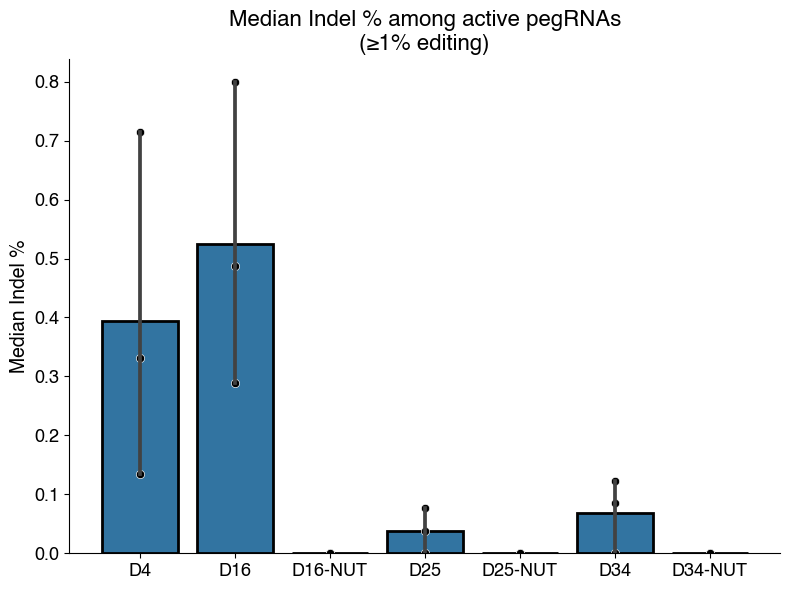

In [47]:
fig, ax = plt.subplots(1,1, figsize=(8,6), sharey=True)

colors = ['tab:blue', 'tab:blue', 'tab:red', 'tab:blue', 'tab:red', 'tab:blue', 'tab:red']

g2 = sns.barplot(data = df_perc, x='Condition', y='Indel % Median', ax=ax, linewidth=2, edgecolor='black', palette=colors)

g2 = sns.scatterplot(data = df_perc, x='Condition', y='Indel % Median', ax=ax, color='black')

# We change the fontsize of minor ticks label 
ax.tick_params(axis='both', which='major', labelsize=13)

ax.set_ylabel("Median Indel %", fontsize=14)
ax.set_title("Median Indel % among active pegRNAs\n(≥1% editing)", fontsize=16)


ax.spines[['top', 'right']].set_visible(False)

ax.set_xlabel('')
fig.tight_layout()

## Extended Data Figure 3d
Boxplot of indel frequency among active pegRNAs (≥1% editing) for each replicate and time-point. Lower quartile = 0% for all replicates (not visible). 


In [43]:
concaters = []
for i, val in enumerate(total_indel):
    nombre = samples[i]
    n_list = [nombre]*len(val)
    d = pd.DataFrame(dict(zip(['Condition', 'Indel%'], [n_list, val])))
    concaters.append(d)

df_combined_indel = pd.concat(concaters)

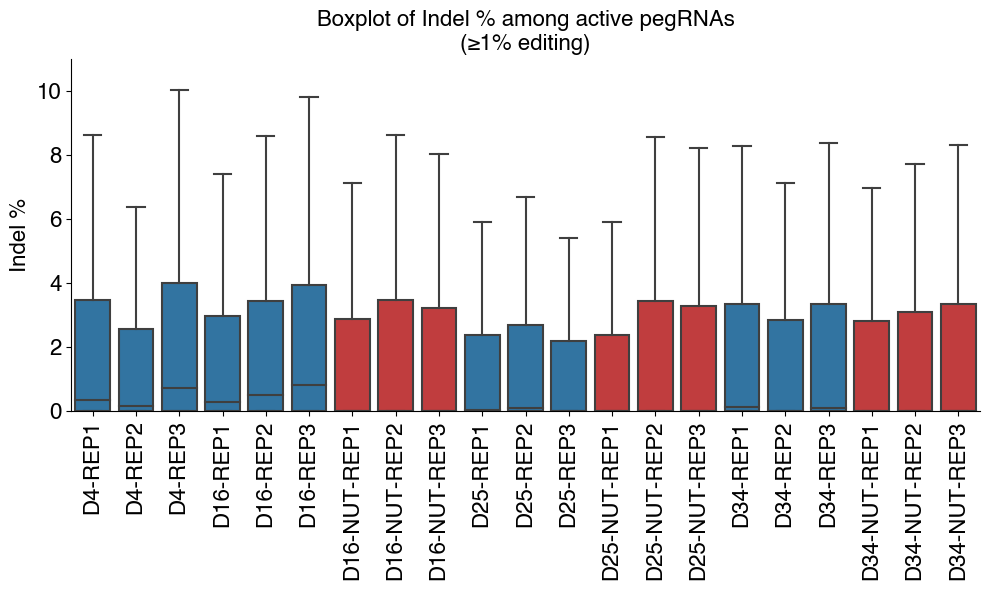

In [49]:
fig, ax = plt.subplots(figsize=(10,6))
colors = ['tab:blue', 'tab:blue', 'tab:blue', 'tab:blue', 'tab:blue', 'tab:blue','tab:red', 'tab:red', 'tab:red', 'tab:blue', 'tab:blue', 'tab:blue','tab:red', 'tab:red', 'tab:red', 'tab:blue', 'tab:blue', 'tab:blue','tab:red', 'tab:red', 'tab:red']

g = sns.boxplot(data = df_combined_indel, x='Condition', y='Indel%', showfliers=False, palette=colors)
ax.set_ylim(0,11)

ax.tick_params(axis='both', which='major', labelsize=16)

ax.set_ylabel("Indel %", fontsize=16)
ax.set_title("Boxplot of Indel % among active pegRNAs\n(≥1% editing)", fontsize=16)

ax.spines[['top', 'right']].set_visible(False)

ax.set_xlabel('')

for i, tick_label in enumerate(g.axes.get_xticklabels()):

    tick_label.set_rotation(90)

fig.tight_layout()

## Extended Data Figure 3e

Histogram of pegRNA editing efficiency in the Nutlin-treated Day 34 samples.

In [4]:
# reading in MERGED correct editing percentages
# this is just adding the outcomes of different replicates to improve sample size

#reading in correct editing percentages
#loading in the merged replicates to boost confidence on sensor
fp = "crispresso_replicates_merged"

reorder = []

conditions = ['D4', 'D16', 'D16-NUT', 'D25', 'D25-NUT', 'D34', 'D34-NUT']

for i in conditions:
    df = pd.read_csv(f"{fp}/{i}_reps_combined.csv")
    df['peg_id'] = p53_filtered['peg_id']
    reorder.append(df)

cp_dict2 = dict(zip(conditions, reorder))

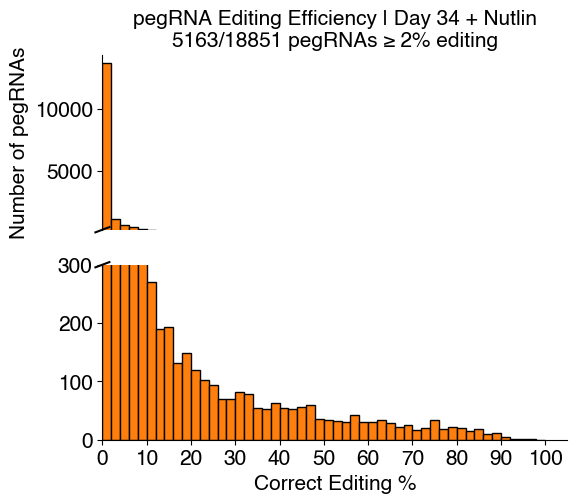

In [88]:
#histogram
#for x in samples[1:]:
x = 'D34-NUT'
df = cp_dict2[x]
count_threshold = 10
fil = df[df['Reads_aligned_all_amplicons']>=count_threshold]

cp = np.array(fil['corr_perc_backsub'])

over5 = sum(cp>=2)
totalvars = len(cp)


f, (ax, ax2) = plt.subplots(2, 1, figsize=(6,5), sharex=True)

ax.hist(cp, bins=np.linspace(0,100,51),edgecolor='black', color='tab:orange', linewidth=1);
ax2.hist(cp, bins=np.linspace(0,100,51),edgecolor='black', color='tab:orange',linewidth=1);


ax.set_xlim(0,)
ax.set_ylim(300,)
ax2.set_ylim(0,300)


ax.set_title(f"pegRNA Editing Efficiency | Day 34 + Nutlin\n{over5}/{totalvars} pegRNAs ≥ 2% editing", fontsize=15)
ax.set_ylabel('Number of pegRNAs', fontsize=15)
ax2.set_xlabel("Correct Editing %", fontsize=15)
ax.tick_params(axis='both', which='major', bottom=False, labelsize=15)
ax2.tick_params(axis='both', which='major', labelsize=15)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)

ax.tick_params(labeltop=False)

ax.set_xticks(np.linspace(0,100,11));

d = .015  # how big to make the diagonal lines in axes coordinates
# arguments to pass to plot, just so we don't keep repeating them
kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
ax.plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal

kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal


## Extended Data Figure 3f

Histogram of pegRNA editing efficiency of the most efficient pegRNA for each variant in the Nutlin-treated Day 34 samples.

In [73]:
#and histogram of most efficient pegRNAs per variant
bb = p53_filtered.copy()

sample = 'D34'
d34 = cp_dict2[sample]

counts_threshold = 10
d34 = d34[d34['Reads_aligned_all_amplicons']>=counts_threshold]

merged = pd.merge(bb, d34, on='peg_id')
uniq_idx = list(np.unique(merged['variant_index']))

i_maxs = []
for idx in uniq_idx:
    sub = merged[merged['variant_index']==idx]
    i_max = sub['corr_perc_backsub'].idxmax()
    i_maxs.append(i_max)


merged = merged.iloc[i_maxs]

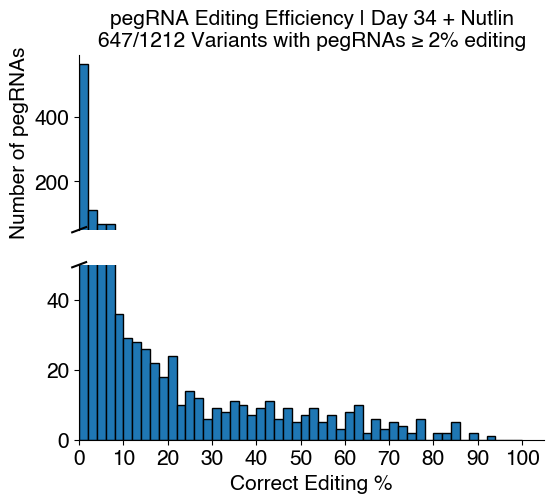

In [90]:
#histogram
#for x in samples[1:]:
cp = np.array(merged['corr_perc_backsub'])

over5 = sum(cp>=2)
totalvars = len(cp)


f, (ax, ax2) = plt.subplots(2, 1, figsize=(6,5), sharex=True)

ax.hist(cp, bins=np.linspace(0,100,51),edgecolor='black', linewidth=1);
ax2.hist(cp, bins=np.linspace(0,100,51),edgecolor='black', linewidth=1);


ax.set_xlim(0,)
ax.set_ylim(50,)
ax2.set_ylim(0,50)


ax.set_title(f"pegRNA Editing Efficiency | Day 34 + Nutlin\n{over5}/{totalvars} Variants with pegRNAs ≥ 2% editing", fontsize=15)
ax.set_ylabel('Number of pegRNAs', fontsize=15)
ax2.set_xlabel("Correct Editing %", fontsize=15)
ax.tick_params(axis='both', which='major', bottom=False, labelsize=15)
ax2.tick_params(axis='both', which='major', labelsize=15)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)

ax.tick_params(labeltop=False)

ax2.set_xticks(np.linspace(0,100,11));


d = .015  # how big to make the diagonal lines in axes coordinates
# arguments to pass to plot, just so we don't keep repeating them
kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
ax.plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal

kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal


## Extended Data Figure 3g

Comaparitive PDF of all pegRNAs and the most efficient pegRNA for each variant.

(0.0, 105.0)

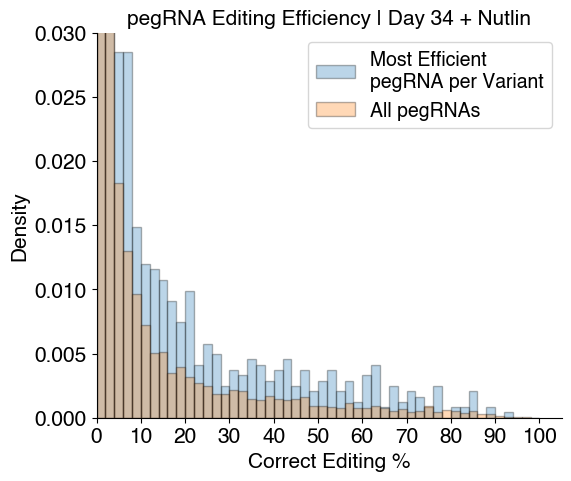

In [92]:
cp = np.array(fil['corr_perc_backsub'])
cp2 = np.array(merged['corr_perc_backsub'])


fig, ax = plt.subplots(figsize=(6,5))

ax.hist(cp2, bins=np.linspace(0,100,51),edgecolor='black', linewidth=1, density=True, alpha=.3, label='Most Efficient\npegRNA per Variant');
ax.hist(cp, bins=np.linspace(0,100,51),edgecolor='black', linewidth=1, density=True, alpha=.3, label='All pegRNAs');

ax.legend(fontsize=14)

ax.set_title(f"pegRNA Editing Efficiency | Day 34 + Nutlin", fontsize=15)
ax.set_ylabel('Density', fontsize=15)
ax.set_xlabel("Correct Editing %", fontsize=15)

ax.tick_params(axis='both', which='major', labelsize=15)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xticks(np.linspace(0,100,11));

ax.set_ylim(0,.03)
ax.set_xlim(0,)

# Extended Data Figure 4 – Training a random forest regressor to predict pegRNA efficiency.
## Extended Data Figure 4a
A random forest regressor was trained on a restricted set of pegRNA features using 70% of the variants in the untreated condition of Day 16 replicate 1. There was no overlap between the variants used for training and testing. The performance on the held-out test set is shown (spearman correlation = 0.61). 

**Note: the exact correlation values will vary depending the model training run

In [238]:
x = 'D16-REP1'
df = cp_dict[x] #see code above (Figure 2a for cp_dict assignment)

counts_threshold=100

#choose a particular variant type if desired
var_types = ['SNV', 'INS', 'DEL', 'ONV'] #['SNP']

chosen = list(p53_filtered[p53_filtered['variant_type'].isin(var_types)]['peg_id'])
df = df[df['peg_id'].isin(chosen)]

df = df[df['Reads_aligned_all_amplicons']>=counts_threshold]

p53_subset = p53_filtered[p53_filtered['peg_id'].isin(list(df['peg_id']))]

#would be easier to just merge these dataframes (functionally the same when indexing is identical like this though)
assert list(p53_subset['peg_id'])==list(df['peg_id']) #ensure indexing is correct

b = p53_subset

In [239]:
#training of the model
from sklearn.ensemble import RandomForestRegressor # for building the model

def model_training():
    #converting PAM sequences and variant types to integers for training
    PAM_dict = {"AGG":0, 'GGG':1, 'CGG':2, 'TGG':3}
    num_PAM = [PAM_dict[k] for k in b['PAM']]
    b['num_PAM'] = num_PAM

    var_dict = {"SNV":0, 'INS':1, 'DEL':2, 'ONV':3}
    num_var = [var_dict[k] for k in b['variant_type']]
    b['var_type'] = num_var

    #adding in correct percentage
    b['corr_perc'] = df['corr_perc_backsub']

    #train, test splitting; ensuring same variant isn't in train and test
    uniq_DNA = np.unique(b['HGVSc'])
    perc_train = .7
    num_train = int(perc_train*len(uniq_DNA))

    train_set = list(np.random.choice(uniq_DNA, size=num_train, replace=False))

    train = b[b['HGVSc'].isin(train_set)]
    test =b[~b['HGVSc'].isin(train_set)]

    X_train = np.array(train[["PBS_length", "Doench16_Azimuth_percentile", "PBS_GC_content", "homology_overhang","distance_to_nick", "RTT_length", "num_PAM", "var_type"]])
    Y_train = np.array(train[["corr_perc"]])

    X_test = np.array(test[["PBS_length", "Doench16_Azimuth_percentile", "PBS_GC_content", "homology_overhang","distance_to_nick", "RTT_length", "num_PAM", "var_type"]])
    Y_test = np.array(test[["corr_perc"]])


    # Initializing the Random Forest Regression model with 10 decision trees
    model = RandomForestRegressor(n_estimators = 1000, random_state = 0)

    # Fitting the Random Forest Regression model to the data
    model.fit(X_train, Y_train)

    return model, X_test, Y_test, test, train

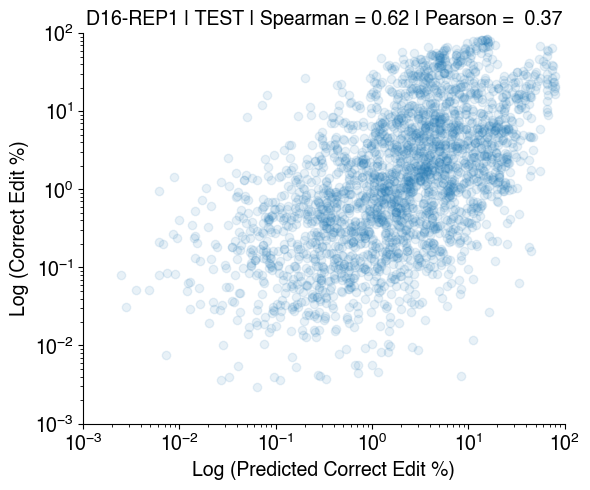

In [241]:
#note: precise values of spearman correlation will vary based on training run
#models can be saved for use with pickle model
model, X_test, Y_test, test, train = model_training()

y_pred = model.predict(X_test)


#----and plotting-------

fig, ax = plt.subplots(figsize=(6,5))
plt.scatter(y_pred, Y_test,alpha=.1)
plt.yscale("log")
plt.xscale("log")
plt.ylim(.001,100)
plt.xlim(.001,100)

plt.ylabel("Log (Correct Edit %)", fontsize=14)
plt.xlabel("Log (Predicted Correct Edit %)", fontsize=14)
plt.xticks(fontsize=14);
plt.yticks(fontsize=14);

jj = scipy.stats.spearmanr(y_pred, Y_test)
j2 = jj.statistic

jj2 = scipy.stats.pearsonr(y_pred, Y_test)
j3 = jj2.statistic

ax.set_title(f'{x} | TEST | Spearman = {np.round(j2, 2)} | Pearson =  {np.round(j3[0], 2)}', fontsize=14)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
fig.tight_layout()

## Extended Data Figure 4b
Assessment of the performance of the random forest regressor in predicting editing activity at each time-point. Again, only variants in the test set are considered. Each dot represents a separate replicate. Spearman correlation between predicted and actual editing is shown in blue, pearson correlation in gray. 


**Note: Requires that you run the cells above (Fig 4a)

In [242]:
#train-test split
#b refers to D16-REP1 above
def rf_format(df, test):
    """ 
    Takes in dataframe + HGVScs to test (to avoid testing on training set)
    produces arrays in correct format for testing
    """
    count_threshold=100

    df = df[df['Reads_aligned_all_amplicons']>=count_threshold]

    p53_subset = p53_filtered[p53_filtered['peg_id'].isin(list(df['peg_id']))]

    assert list(p53_subset['peg_id'])==list(df['peg_id']) #ensure indexing is correct

    b2 = p53_subset

    PAM_dict = {"AGG":0, 'GGG':1, 'CGG':2, 'TGG':3}
    num_PAM = [PAM_dict[k] for k in b2['PAM']]
    b2['num_PAM'] = num_PAM

    var_dict = {"SNV":0, 'INS':1, 'DEL':2, 'ONV':3}
    num_var = [var_dict[k] for k in b2['variant_type']]
    b2['var_type'] = num_var

    #adding in correct percentage
    b2['corr_perc'] = df['corr_perc_backsub']

    #selecting just the appropriate subset
    b2 =b2[b2['peg_id'].isin(list(test['peg_id']))]

    X = np.array(b2[["PBS_length", "Doench16_Azimuth_percentile", "PBS_GC_content", "homology_overhang","distance_to_nick", "RTT_length", "num_PAM", "var_type"]])
    Y = np.array(b2[["corr_perc"]])

    return X, Y

In [243]:
s = []
p = []
for x in samples[1:]:

    df = cp_dict[x]
    x,y = rf_format(df, test)

    y_pred = model.predict(x)

    jj = scipy.stats.spearmanr(y_pred, y)
    j2 = jj.statistic
    s.append(j2)
    p.append(scipy.stats.pearsonr(y_pred, y).statistic[0])

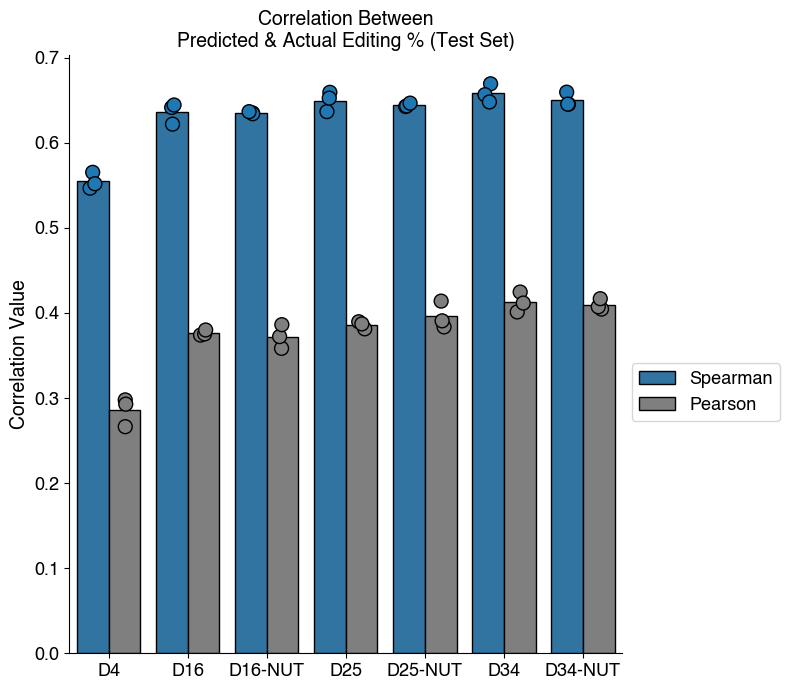

In [248]:
a = pd.DataFrame(dict(zip(['sample', 'condition', 'Correlation type', 'Value'], [samples[1:], conditions, ['Spearman']*len(conditions), s])))
b = pd.DataFrame(dict(zip(['sample', 'condition', 'Correlation type', 'Value'], [samples[1:], conditions, ['Pearson']*len(conditions), p])))
rf = pd.concat((a,b))

fig, ax = plt.subplots(figsize=(8,7))
g = sns.barplot(data=rf, x='condition', y='Value', hue='Correlation type', ax=ax, linewidth=1, edgecolor='black', errorbar=None, palette=['tab:blue', 'tab:grey'])

g = sns.stripplot(data=rf, x='condition', y='Value', hue='Correlation type', ax=ax, size=10, linewidth=1, edgecolor='black', dodge=True, legend=False, palette=['tab:blue', 'tab:grey'])

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.legend(fontsize=13, bbox_to_anchor=(1,.5))
ax.tick_params(axis='both', which='major', labelsize=13)

ax.set_ylabel("Correlation Value", fontsize=14)
ax.set_xlabel("")
ax.set_title('Correlation Between\nPredicted & Actual Editing % (Test Set)', fontsize=14)
fig.tight_layout()

# Extended Data Figure 5 – Correlation in pegRNA LFC among conditions and time-points. 

Each panel is a density plot of the LFC in pegRNAs at each time-point/condition (i.e. x-axis = LFC of the pegRNAs corresponding with that column’s sample, and y-axis = LFC of the pegRNAs corresponding with that row’s samples). Replicates were merged using MAGeCK to generate a single (median) LFC for each pegRNA at each time-point. Rs = spearman correlation. 


In [51]:
samps = ['D16', 'D16-NUT', 'D25', 'D25-NUT', 'D34', 'D34-NUT']

#reading in mageck
fp = './MAGeCK analysis'
files = os.listdir(fp)
files = sorted([f for f in files if f[-3:]=='txt'])

dfs = []
for i,f in enumerate(files):
    df = pd.read_csv(fp + '/' + f, sep='\t')

    #ensure naming is correct
    assert f[:3]==samps[i][:3]

    #reorder the pegs...
    df = df.rename(columns = {'sgrna':'peg_id'})
    df_merge = pd.merge(p53_filtered, df, how='left', on='peg_id')

    #also add in merge of cp_dict?

    dfs.append(df_merge)


#perform thresholding of control_mean counts (filtering out pegRNAs with below 10 control counts mean)
#differences in counts because of normalization
#going to do it for one and apply it to all...

control_mean_threshold = 10

#d16
dd = dfs[0]
dd = dd[dd['control_mean']>=control_mean_threshold]
pegs_above_thres = dd['peg_id']

dfs2 = []
for i in dfs:
    dfs2.append(i[i['peg_id'].isin(pegs_above_thres)])


assert list(dfs2[0]['peg_id']) == list(dfs2[1]['peg_id']) 
assert list(dfs2[0]['peg_id']) == list(dfs2[2]['peg_id']) 
assert list(dfs2[0]['peg_id']) == list(dfs2[3]['peg_id']) 
assert list(dfs2[0]['peg_id']) == list(dfs2[4]['peg_id']) 
assert list(dfs2[0]['peg_id']) == list(dfs2[5]['peg_id']) 

mageck_dict = dict(zip(samps, dfs2))

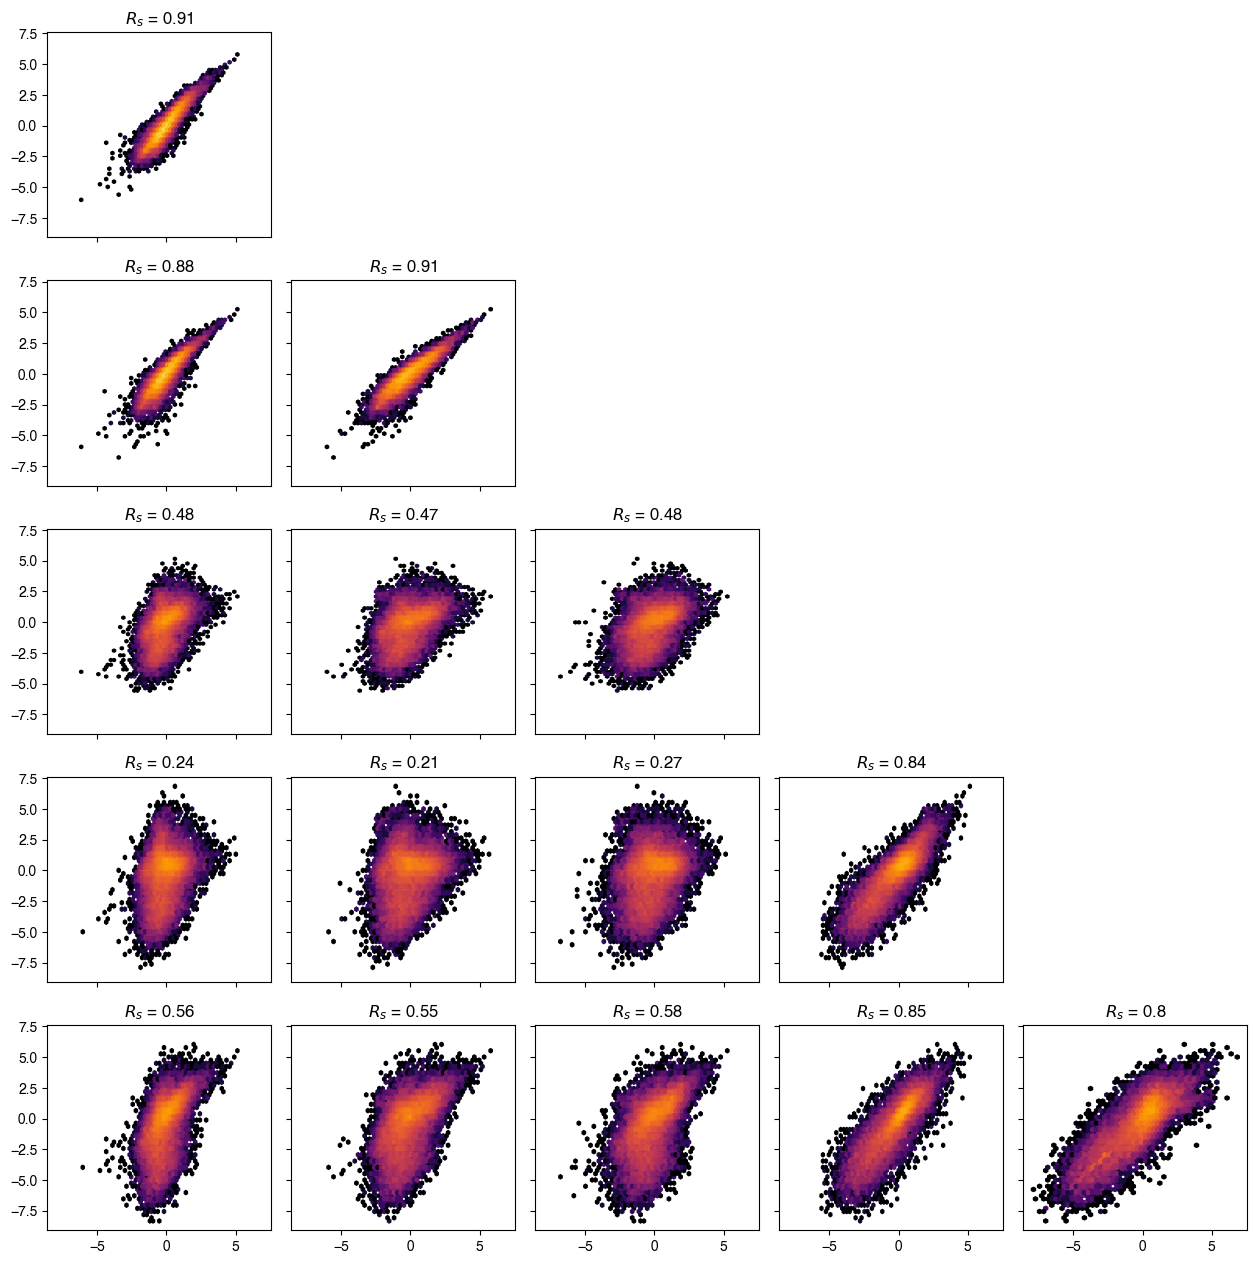

In [57]:

labels = ['D16', 'D25', 'D34', 'D16-NUT', 'D25-NUT', 'D34-NUT']

fig, ax1 = plt.subplots(6,6,sharex=True, sharey=True, figsize=(15,15))

peg_dict = mageck_dict
for i, val in enumerate(labels):
    x=peg_dict[val]['LFC']
    for i2, val2 in enumerate(labels):
        y=peg_dict[val2]['LFC']

        hb = ax1[i][i2].hexbin(y, x, gridsize=50, bins='log', cmap='inferno', vmax=1e3)
        s1 = scipy.stats.spearmanr(x,y).statistic
        ax1[i][i2].set_title('$R_{s}$ = ' + str(np.round(s1,2)))

for i in range(6):
    for k in range(6):
        if k>=i:
            fig.delaxes(ax1[i][k])

fig.tight_layout()

# Extended Data Figure 6 – Filtration of screening data by sensor editing efficiency. 
## Extended Data Figure 6a-d

The LFC of a, pegRNAs ≥ 20% editing b, pegRNAs ≥ 30% editing c, pegRNAs ≥ 40% editing d, pegRNAs ≥ 50% editing, with at least 10 sensor reads at Day 34 relative to Day 4 in the Nutlin-treated condition, with pegRNAs colored by editing efficiency (left) and colored by variant type (right). Selected enriching pegRNAs with FDR < .05 labeled and depleting pegRNAs with FDR < .05 labeled. Blue = SNV, Green = INS, Purple = DEL, Gray = Silent.

**Note: Not each plot is reproduced here. However, by simply modifying the correct_perc_min parameter, the thresholds for including a pegRNA in the plot can be modified, and the output generated.


In [249]:
# first read in MAGEcK data + correct editing data for each pegRNA
#reading the MAGeCK results into a dictionary
#and also reading in information about correct editing percentage

#loading in the data
p53_filtered = pd.read_csv('p53_PE_sensor_FINAL_clean.csv')


#loading in the merged replicates to boost confidence on sensor
fp = "crispresso_replicates_merged"
reorder = []
conditions = ['D4', 'D16', 'D16-NUT', 'D25', 'D25-NUT', 'D34', 'D34-NUT']
for i in conditions:
    df = pd.read_csv(f"{fp}/{i}_reps_combined.csv")
    df['peg_id'] = p53_filtered['peg_id']
    reorder.append(df)

cp_dict2 = dict(zip(conditions, reorder))
samps = list(cp_dict2.keys())[1:]


#reading in mageck
fp = './MAGeCK analysis'
files = os.listdir(fp)
files = sorted([f for f in files if f[-3:]=='txt'])

dfs = []
for i,f in enumerate(files):
    df = pd.read_csv(fp + '/' + f, sep='\t')

    #ensure naming is correct
    assert f[:3]==samps[i][:3]

    #reorder the pegs...
    df = df.rename(columns = {'sgrna':'peg_id'})
    df_merge = pd.merge(p53_filtered, df, how='left', on='peg_id')

    #also add in merge of cp_dict?

    dfs.append(df_merge)


#perform thresholding of control_mean counts (filtering out pegRNAs with below 10 control counts mean)
#differences in counts because of normalization
#going to do it for one and apply it to all...

control_mean_threshold = 10

#d16
dd = dfs[0]
dd = dd[dd['control_mean']>=control_mean_threshold]
pegs_above_thres = dd['peg_id']

dfs2 = []
for i in dfs:
    dfs2.append(i[i['peg_id'].isin(pegs_above_thres)])


assert list(dfs2[0]['peg_id']) == list(dfs2[1]['peg_id']) 
assert list(dfs2[0]['peg_id']) == list(dfs2[2]['peg_id']) 
assert list(dfs2[0]['peg_id']) == list(dfs2[3]['peg_id']) 
assert list(dfs2[0]['peg_id']) == list(dfs2[4]['peg_id']) 
assert list(dfs2[0]['peg_id']) == list(dfs2[5]['peg_id']) 

mageck_dict = dict(zip(samps, dfs2))

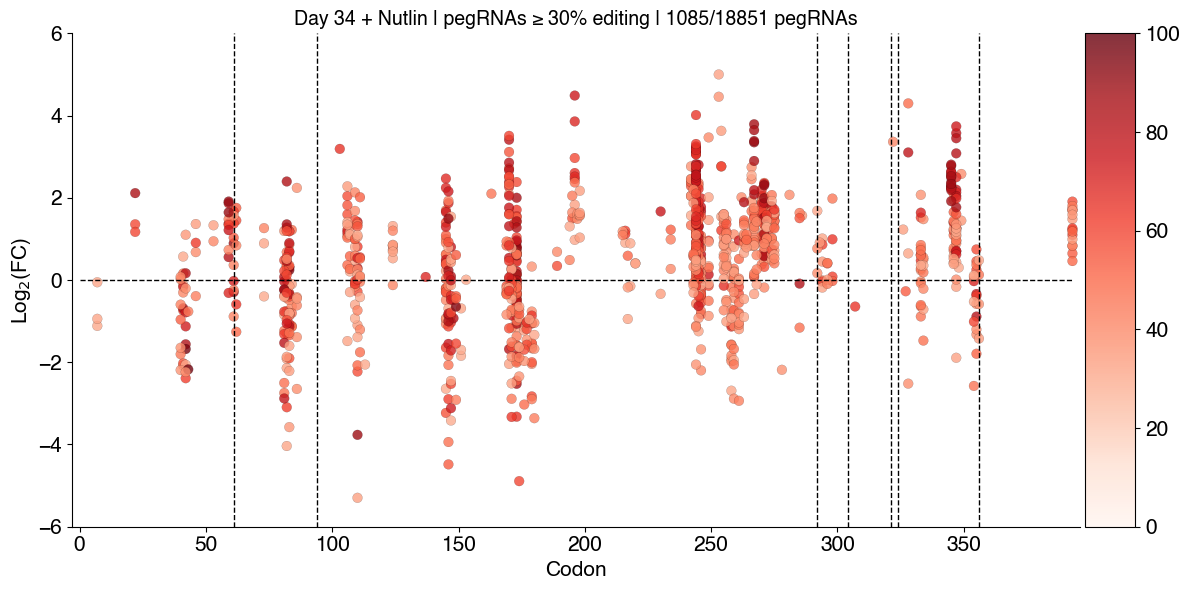

In [250]:
sample = 'D34-NUT'
corr_perc_min = 30 #MODIFY THIS PARAMETER TO GENERATE ALTERNATE PLOTS
corr_perc_max = 100

counts_threshold=10

fig, ax = plt.subplots(figsize=(12,6))

bb = mageck_dict[sample].copy()
bb = bb.replace(0,1e-5) #for the log FDR calculation
bb['-log10(FDR)']=-np.log10(bb['FDR'])
bb['FDR_below_.05'] = bb['FDR']<.05

d34 = cp_dict2[sample]
d34 = d34[d34['Reads_aligned_all_amplicons']>=counts_threshold]
p = d34[(d34['corr_perc_backsub']>=corr_perc_min) & (d34['corr_perc_backsub']<=corr_perc_max)]

bb = pd.merge(bb, p, on='peg_id')


g = ax.scatter(data = bb, x='codon', y='LFC', c='corr_perc_backsub', cmap='Reds', vmin=0, vmax=100, alpha=.8, s=50, edgecolor='black', linewidths=.1)
#plt.colorbar()

divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.05)


fig.colorbar(g, cax=cax, orientation='vertical')

ax.plot([0,393],[0,0], linewidth=1, linestyle='dashed', color='black')
ax.set_title(f"Day 34 + Nutlin | pegRNAs ≥ {corr_perc_min}% editing | {len(bb)}/{len(d34)} pegRNAs", fontsize=14)
ax.set_ylim(-6,6)
ax.set_xlim(-3,396)
ax.set_ylabel("Log$_{2}$(FC)", fontsize=15)
ax.set_xlabel("Codon", fontsize=15)


ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(axis='both', which='major', labelsize=15)
cax.tick_params(axis='both', which='major', labelsize=15)


#plotting domain lines

boundaries = [61,94,292,304,321,324,356]
for bound in boundaries:
    ax.plot([bound, bound],[-6,6], linewidth=1, linestyle='dashed', color='black')


fig.tight_layout()

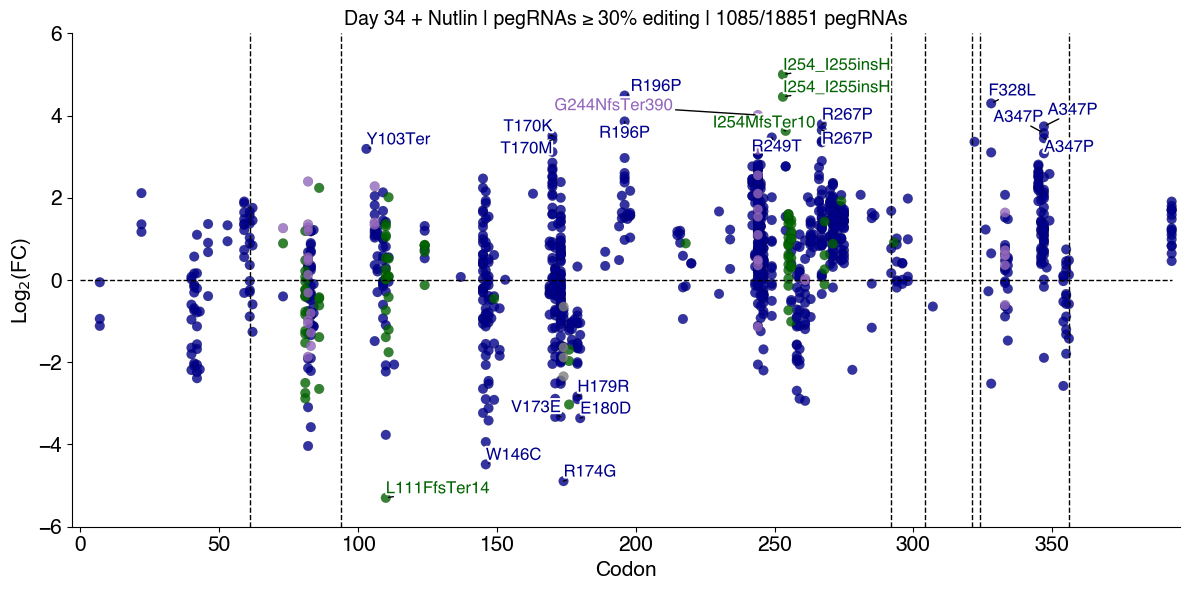

In [254]:
sample = 'D34-NUT'
corr_perc_min = 30 #MODIFY THIS PARAMETER TO GENERATE ALTERNATE PLOTS
corr_perc_max = 100
counts_threshold=10


fig, ax = plt.subplots(figsize=(12,6))

bb = mageck_dict[sample].copy()
bb = bb.replace(0,1e-5) #for the log FDR calculation
bb['-log10(FDR)']=-np.log10(bb['FDR'])
bb['FDR_below_.05'] = bb['FDR']<.05

d34 = cp_dict2[sample]
d34 = d34[d34['Reads_aligned_all_amplicons']>=counts_threshold]
p = d34[(d34['corr_perc_backsub']>=corr_perc_min) & (d34['corr_perc_backsub']<=corr_perc_max)]

bb = pd.merge(bb, p, on='peg_id')


c_dict = {'SNV':'darkblue', 'INS':'darkgreen', 'DEL':'tab:purple', 'ONV':'grey'}

bb['color'] = [c_dict[i] for i in bb['variant_type']]


g = ax.scatter(data = bb, x='codon', y='LFC', c='color', alpha=.8, s=50, edgecolor='black', linewidths=.1)
""
ax.plot([0,393],[0,0], linewidth=1, linestyle='dashed', color='black')
ax.set_title(f"Day 34 + Nutlin | pegRNAs ≥ {corr_perc_min}% editing | {len(bb)}/{len(d34)} pegRNAs", fontsize=14)
ax.set_ylim(-6,6)
ax.set_xlim(-3,396)
ax.set_ylabel("Log$_{2}$(FC)", fontsize=15)
ax.set_xlabel("Codon", fontsize=15)


ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(axis='both', which='major', labelsize=15)


#plotting domain lines
boundaries = [61,94,292,304,321,324,356]
for bound in boundaries:
    ax.plot([bound, bound],[-6,6], linewidth=1, linestyle='dashed', color='black')


#pegRNA annotation
#text annotation code
cutoff = 3.4
min_cutoff = -4

bbb1 = bb[bb['LFC']>=cutoff]

bbb2 = bb[bb['LFC']<=-.5]
bbb2 = bbb2[bbb2['FDR_below_.05']==True]

first_half = bb[bb['codon']<=160]
fh1 = first_half[first_half['LFC']>=2.5]

bb2 = pd.concat((bbb1, bbb2, fh1))

t = list(bb2['Gene'])
x=list(bb2['codon'])
y = list(bb2['LFC'])
c = list(bb2['variant_type'])
#adjust_text(texts, x, y, arrowprops=dict(arrowstyle="->", color='r', lw=0.5))

c_dict = {'SNV':'darkblue', 'INS':'darkgreen', 'DEL':'tab:purple', 'ONV':'grey'}

texts = [ax.text(x[i], y[i], t[i], fontsize=12, color=c_dict[c[i]], path_effects=[PathEffects.withStroke(linewidth=3,
                                                                                  foreground="w")]) for i in range(len(x))] #bbox = dict(boxstyle = 'round,pad=0.5', fc = 'white', alpha = .9)


adjust_text(texts,only_move={'points':'y', 'texts':'xy'}, ax=ax, arrowprops=dict(arrowstyle="-", linewidth=1, alpha=1, color='black'))


fig.tight_layout()

# Extended Data Figure 7 – Competition assays functionally validate the pathogenicity of TP53 variants identified with prime editing screens.

Full competition assay plots for each of the 29 pegRNAs chosen for validation. Flow cytometric analyses were performed at days 7 and 14 following the initiation of the competition assay. For data points with fewer than 400 flow cytometry events (indicating insufficient viable cells), the RFP positive percentage was set to be equal to that of the previous time-point. 

This figure is recreated in figure4.ipynb (see Figure 4d)